In [1]:
#dependencies for visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import importlib

sys.path.append(os.path.abspath(".."))
import misc
importlib.reload(misc)
from misc import load_csv_dataset

data = load_csv_dataset("name_dataset.csv")
df = pd.DataFrame(data)

>> Loading CSV dataset from name_dataset.csv


In [ ]:
#breakdown of names into surname, middle name and first name
#constraint: take into account compound names (eg. ILUNGA WA ILUNGA MARC)
#            take into account missing names (eg. LOKUA KANZA, KASONGO GERMAINE)

df['split'] = df['name'].str.strip().str.split()
df = df[df['split'].notna() & df['split'].str.len() > 0]
df['surname'] = df['split'].apply(lambda x: x[0] if len(x) >= 1 else "null")
df['first_name'] = df['split'].apply(lambda x: x[-1] if len(x) >= 2 else "null")
df['middle_name'] = df['split'].apply(lambda x: ' '.join(x[1:-1]) if len(x) > 2 else "null")
df.drop(columns=['split'], inplace=True)
df[['name', 'surname', 'middle_name', 'first_name']].head()

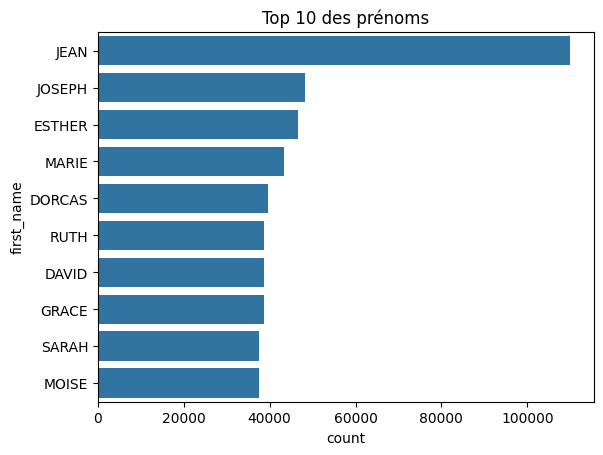

In [4]:
# Simple distribution of first names (display of the 10 most popular first names)
sns.countplot(y=df['first_name'], order=df['first_name'].value_counts().iloc[:10].index)
plt.title("Top 10 des prénoms")
plt.show()

In [9]:
firstnames = df['first_name'].value_counts()
df_firstnames = firstnames.reset_index()
df_firstnames.columns = ['prenom', 'nombre']
df_firstnames.head(10)

,prenom,nombre
0,JEAN,110011
1,JOSEPH,48119
2,ESTHER,46597
3,MARIE,43267
4,DORCAS,39549
5,RUTH,38785
6,DAVID,38748
7,GRACE,38639
8,SARAH,37571
9,MOISE,37498


In [ ]:
total_firstnames = df['first_name'].notna().sum()
print(f">> Nombre total de prénoms enregistrés : {total_firstnames}")


>> Le prénom 'AMAURY' apparaît 4 fois.



,name,region
3259117,LUMBE EDELO AMAURY,global
3944162,CANSA KAYEMBE AMAURY,haut-katanga-1
7282030,LUMBE EDELO AMAURY,kinshasa-ouest
7734209,CANSA KAYEMBE AMAURY,global
